Meu computador, meu laboratório
===============================



## Objetivo



Elabore uma pergunta/hipótese e teste ela usando um experimento computacional. Mostre graficamente um histograma dos resultados obtidos nas suas simulações e discuta se conseguiu responder sua pergunta/hipótese. Tente ser criativo e realizar um experimento suficientemente diferente dos realizados em sala.

Sugestões de situações/processos para simular:

-   Baralho de cartas (ex: qual a chance de sortear 5 cartas do mesmo naipe ou qual a chance sortear 3 cartas em ordem crescente. Pode pensar em aplicações em jogos como Poker ou Truco pois, afinal, a probabilidade nasceu nos jogos de azar);
-   Jogos de tabuleiros (pensar em estratégias de otimização assim como as discutidas sobre o jogo Catan em aula);
-   Datas de aniversário (ex: qual chance de pelo menos duas pessoas fazerem aniversário no mesmo dia num grupo de $n$ pessoas)

Escolha o experimento que preferir, não precisa se limitar às sugestões.



## Resultado e discussão



### Pergunta Motivadora:
"Qual a probabilidade de quem em um jogo de rpg converncional (dungeons and dragons), de que um jogador crite (tire o maior valor do dado) em todos os dados possíveis de maneira seguida e considerando desvantagem (jogar duas vezes o mesmo dado e pegando o menor valor)."

In [136]:
from random import choice
import statistics as st

possiveis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

def rolar_d20(lista):
    return choice(lista)

def d20_dvt(lista):
    rolada = choice(lista)
    rolada2 = choice(lista)
    if rolada <= rolada2:
        return rolada
    else:
        return rolada2

def d20_adv(lista):
    rolada = choice(lista)
    rolada2 = choice(lista)
    if rolada >= rolada2:
        return rolada
    else:
        return rolada2
    
print(rolar_d20(possiveis))
print(d20_dvt(possiveis))
print(d20_adv(possiveis))

14
7
11


Considerando uma estimativa de 1000 roladas de dados de 20 lados durante uma sessão extremamente longa de rpg que só tem nerd muito esquisito e sem nada pra fazer (nós), onde seu personagem pode estar normal, com vantagem ou com desvantagem, aqui vai uma análise da moda de cada tipo de rolada. 

In [137]:
def jogar_1000():
    resultado1 = []
    resultado2 = []
    resultado3 = []
    for _ in range(1000):
        resultado1.append(rolar_d20(possiveis))
        resultado2.append(d20_dvt(possiveis))
        resultado3.append(d20_adv(possiveis))
    return resultado1, resultado2, resultado3

normal, dvt, adv = jogar_1000()

moda1 = st.mode(normal)
moda2 = st.mode(dvt)
moda3 = st.mode(adv)

print(f'A moda da rolagem normal é de: {moda1}')
print(f'A moda da rolagem com desvantagem é de: {moda2}')
print(f'A moda da rolagem com vantagem é de: {moda3}')

A moda da rolagem normal é de: 12
A moda da rolagem com desvantagem é de: 1
A moda da rolagem com vantagem é de: 20


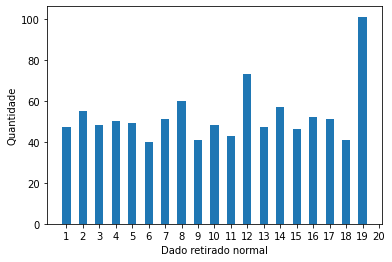

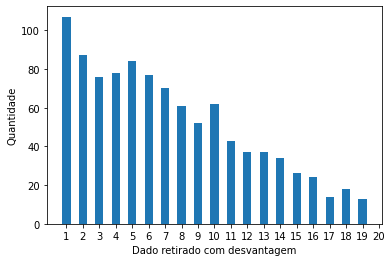

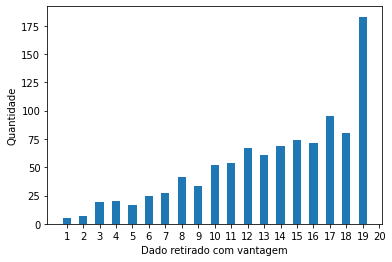

In [138]:
import matplotlib.pyplot as plt

def histograma(n, label):
    figura, eixo = plt.subplots()
    eixo.hist(n, bins=range(1, 21), align="left", rwidth=0.5)
    eixo.set_xticks(range(1, 21))
    eixo.set_xlabel(f'Dado retirado {label}')
    eixo.set_ylabel("Quantidade")

histograma(normal, "normal")
histograma(dvt, "com desvantagem")
histograma(adv, "com vantagem")

É notável que para uma população grande de dados, a moda das rolagens se adaptam às condições impostas. Para as rolagens de vantagem, grande parte das modas ao rodar o código, dão acima de 18, enquanto para as de desvantagens, as modas davam menor que 3. Já para a rolagem normal, a moda varia completamente, indo de literalmente 20 a 1. 
Portanto, quando você tem algum tipo de habilidade que pode degradar sua "sorte" ou aumentá-la, é consideravelmente recomendável que você use isso a seu favor, seja isso equipando ou desequipando o item/magia/etc.

In [150]:
def verify(lista): #Verifica dados seguidos
    count = 0
    stop = 0
    for i in range(len(lista)):
        if lista[i] == 20 and lista[i] == lista[i+1]:
            count = count + 1
        if lista[i] != 20 or lista[i] != lista[i+1]:
            stop = stop + 1
    return count, stop

print(verify(normal))
print(verify(dvt))
print(verify(adv))

#NÃO DEU CERTO

(1, 999)
(0, 1000)
(14, 986)


In [151]:
from itertools import groupby

teste = [1,2,2,2,20,20,20,20,5,5,20,20,20,10,20,20,20,20,20]

def tentativa(n, lista): #Peguei do stack overflow
    repeticoes = {}
    for n, grupo in groupby(lista):
        vezes_repetido = len(list(grupo))
        if n not in repeticoes or vezes_repetido > repeticoes[n]:
            repeticoes[n] = vezes_repetido
        for n, vezes_repetido in repeticoes.items(): 
            print(f'O número {n} se repete {vezes_repetido} vezes')    
    return vezes_repetido

print(tentativa(20, teste))
print(tentativa("18", normal))
print(tentativa("1", dvt))
print(tentativa("20", adv))

O número 1 se repete 1 vezes
O número 1 se repete 1 vezes
O número 2 se repete 3 vezes
O número 1 se repete 1 vezes
O número 2 se repete 3 vezes
O número 20 se repete 4 vezes
O número 1 se repete 1 vezes
O número 2 se repete 3 vezes
O número 20 se repete 4 vezes
O número 5 se repete 2 vezes
O número 1 se repete 1 vezes
O número 2 se repete 3 vezes
O número 20 se repete 4 vezes
O número 5 se repete 2 vezes
O número 1 se repete 1 vezes
O número 2 se repete 3 vezes
O número 20 se repete 4 vezes
O número 5 se repete 2 vezes
O número 10 se repete 1 vezes
O número 1 se repete 1 vezes
O número 2 se repete 3 vezes
O número 20 se repete 5 vezes
O número 5 se repete 2 vezes
O número 10 se repete 1 vezes
1
O número 2 se repete 1 vezes
O número 2 se repete 1 vezes
O número 4 se repete 1 vezes
O número 2 se repete 1 vezes
O número 4 se repete 1 vezes
O número 7 se repete 1 vezes
O número 2 se repete 1 vezes
O número 4 se repete 1 vezes
O número 7 se repete 1 vezes
O número 9 se repete 1 vezes
O núm

## Referências



Escreva nesta seção as referências consultadas.

https://pt.stackoverflow.com/questions/556270/como-fazer-a-contagem-de-números-consecutivos-iguais-em-uma-lista-em-python
https://www.geeksforgeeks.org/itertools-groupby-in-python/

## Playground



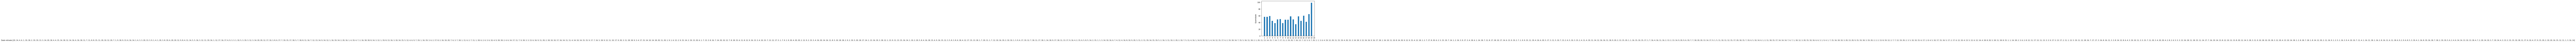

In [86]:
def histograma(n):
    figura, eixo = plt.subplots()
    eixo.hist(n, bins=range(1, 21), align="left", rwidth=0.5)
    eixo.set_xticks(range(1, 21))
    eixo.set_xlabel(f'Dado retirado {n}')
    eixo.set_ylabel("Quantidade")

histograma(normal)

Olha o tamanho piquitinho do histograma